# Stroke Prediction|Multiple Models|Classification



# Stroke Prediction

In [108]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


## Importing Libraries

In [110]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import imblearn

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, auc, roc_curve, confusion_matrix

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

## Importing Data

In [ ]:
#Loading the required data
df = pd.read_csv('C:/Users/gabri/Downloads/Diabetes/diabetes_data.csv')
pd.set_option('display.max_columns',30)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

## Data Analysis

### Verificando valores nulos

In [ ]:
#Assessing for missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

### Verificando valores únicos das variáveis

In [ ]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


É evidente dos dados acima que a maioria dos atributos são de natureza categórica, e apenas alguns deles possuem valores contínuos.

### Separando as colunas numéricas das categóricas

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
# cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
#        'Diabetes', 'HighBP', 'Stroke']

# Identificando variáveis categóricas e numéricas com base nos valores únicos
categorical_cols = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                   'GenHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
numerical_cols = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

### Análise do desbalanceamento da variável alvo (Stroke)

In [ ]:
# Contagem de valores da variável alvo
target_counts = df['Stroke'].value_counts()
print("Contagem da variável alvo (Stroke):")
print(target_counts)

# Proporção de cada classe
target_props = df['Stroke'].value_counts(normalize=True) * 100
print("\nProporção de cada classe (%):")
print(target_props)

# Razão de desbalanceamento
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nRazão de desbalanceamento: {imbalance_ratio:.2f}")

# Visualização do desbalanceamento
plt.figure(figsize=(10, 6))
sns.countplot(x='Stroke', data=df)
plt.title('Distribuição da Variável Alvo (Stroke)')
plt.xlabel('Stroke (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.savefig('C:/Users/gabri/Downloads/Diabetes/stroke_distribution.png')
plt.show()
plt.close()

print("Gráfico da distribuição salvo como 'stroke_distribution.png'")

Contagem da variável alvo (Stroke):
Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

Proporção de cada classe (%):
Stroke
0.0    93.782889
1.0     6.217111
Name: proportion, dtype: float64

Razão de desbalanceamento: 15.08
Gráfico da distribuição salvo como 'stroke_distribution.png'


### Análise Estatística das variáveis numéricas

In [ ]:
# Estatísticas descritivas para variáveis numéricas
numeric_stats = df[numerical_cols].describe().T

# Adicionando mais métricas estatísticas
numeric_stats['mode'] = df[numerical_cols].mode().iloc[0]
numeric_stats['skewness'] = df[numerical_cols].skew()
numeric_stats['kurtosis'] = df[numerical_cols].kurtosis()
numeric_stats['iqr'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['cv'] = numeric_stats['std'] / numeric_stats['mean'] * 100  # Coeficiente de variação

print(numeric_stats)

            count       mean        std   min   25%   50%   75%   max  mode  \
Age       70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0  13.0  10.0   
BMI       70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0  98.0  27.0   
MentHlth  70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0  30.0   0.0   
PhysHlth  70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0  30.0   0.0   

          skewness  kurtosis  iqr          cv  
Age      -0.545923 -0.213232  4.0   33.226176  
BMI       1.719180  7.164081  8.0   23.826765  
MentHlth  2.388110  4.491547  2.0  217.365302  
PhysHlth  1.657304  1.179731  6.0  173.176219  


In [ ]:
# Visualizando a distribuição das variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Média: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.2f}')
    plt.legend()
plt.tight_layout()
# plt.savefig('numeric_distributions.png')
# print("Gráficos das distribuições numéricas salvos como 'numeric_distributions.png'")
plt.show()
plt.close()



Gráficos das distribuições numéricas salvos como 'numeric_distributions.png'


Boxplots das variáveis numéricas salvos como 'numeric_boxplots.png'


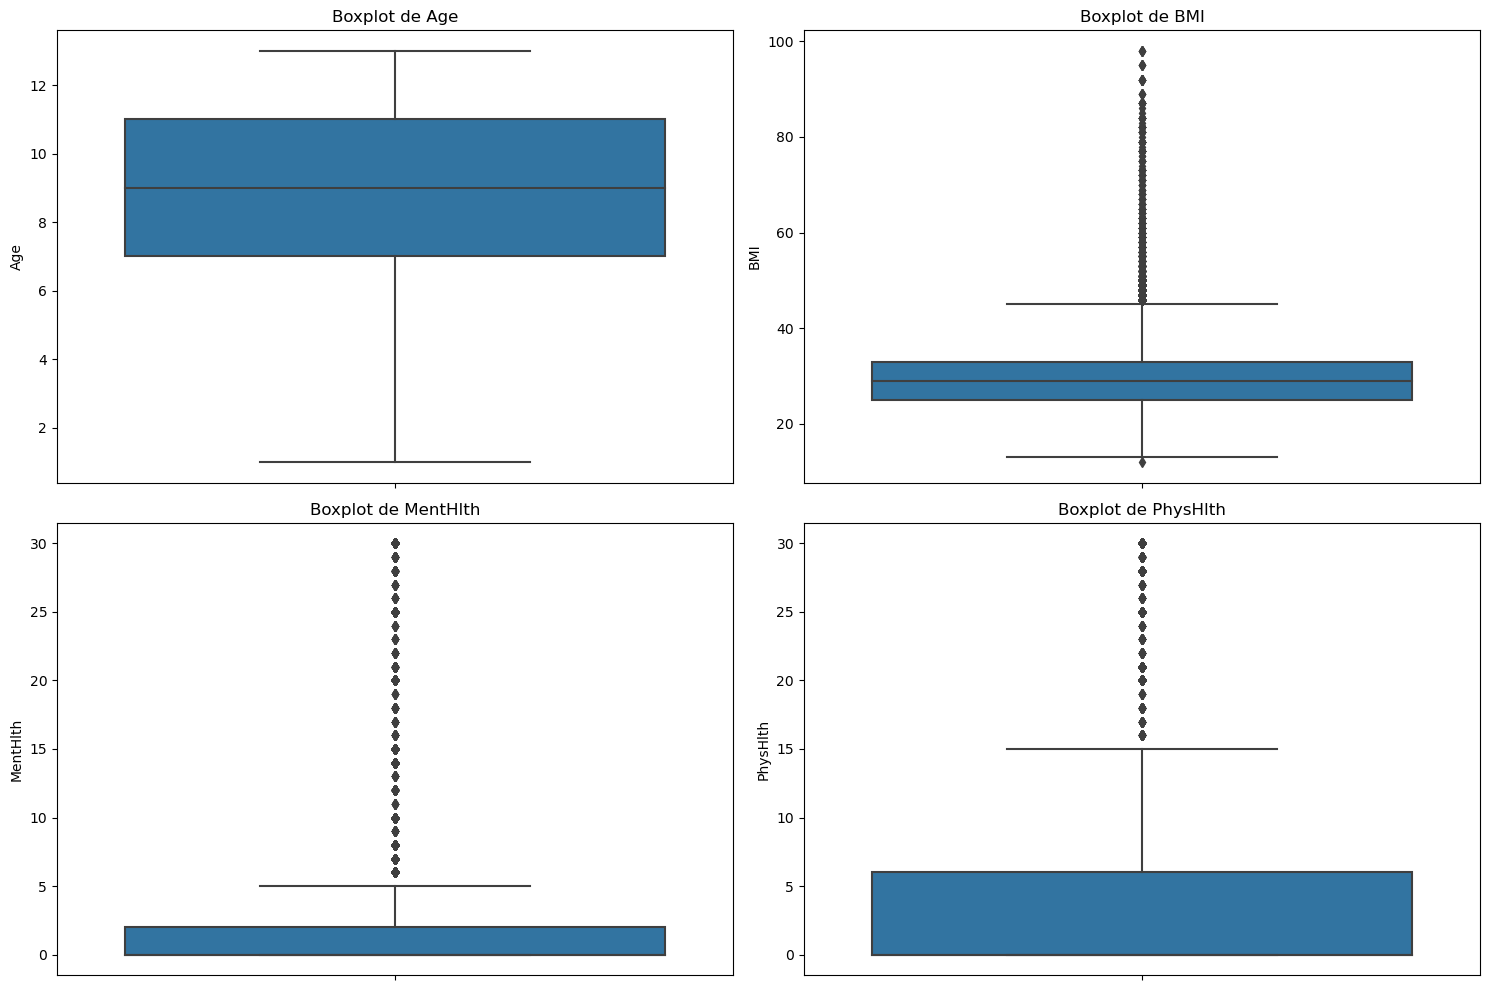

In [ ]:
# Boxplots para identificar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
# plt.savefig('C:/Users/gabri/Downloads/Diabetes/numeric_boxplots.png')
# print("Boxplots das variáveis numéricas salvos como 'numeric_boxplots.png'")
plt.show()
plt.close()



### Análise Estatística das variáveis categóricas

In [ ]:
# Função para analisar variáveis categóricas
def analyze_categorical(df, col_name):
    counts = df[col_name].value_counts().sort_index()
    proportions = df[col_name].value_counts(normalize=True).sort_index() * 100
    mode_value = df[col_name].mode()[0]
    
    print(f"\nAnálise da variável: {col_name}")
    print("-" * 40)
    print("Valores únicos:", df[col_name].nunique())
    print("Moda (valor mais frequente):", mode_value)
    print("\nContagem de cada categoria:")
    print(counts)
    print("\nProporção de cada categoria (%):")
    print(proportions)
    
    # Verificando desbalanceamento
    if len(counts) > 1:
        imbalance = counts.max() / counts.min()
        print(f"\nRazão de desbalanceamento: {imbalance:.2f}")
    
    # Visualização
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col_name, data=df)
    plt.title(f'Distribuição da variável {col_name}')
    plt.ylabel('Contagem')
    # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col_name}_distribution.png')
    # print(f"Gráfico salvo como '{col_name}_distribution.png'")
    plt.show()
    plt.close()
    
    
    
    return counts, proportions

# Analisando cada variável categórica
for col in categorical_cols:
    analyze_categorical(df, col)


Análise da variável: Sex
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 0.0

Contagem de cada categoria:
Sex
0.0    38386
1.0    32306
Name: count, dtype: int64

Proporção de cada categoria (%):
Sex
0.0    54.300345
1.0    45.699655
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.19
Gráfico salvo como 'Sex_distribution.png'

Análise da variável: HighChol
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
HighChol
0.0    33529
1.0    37163
Name: count, dtype: int64

Proporção de cada categoria (%):
HighChol
0.0    47.429695
1.0    52.570305
Name: proportion, dtype: float64

Razão de desbalanceamento: 1.11
Gráfico salvo como 'HighChol_distribution.png'

Análise da variável: CholCheck
----------------------------------------
Valores únicos: 2
Moda (valor mais frequente): 1.0

Contagem de cada categoria:
CholCheck
0.0     1749
1.0    68943
Name: count, dtype: int64

In [ ]:
# #Presenting the countplots for categorical features
# for i in cols:
#   fig, ax = plt.subplots(1,1, figsize=(15, 6))
#   sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
#   plt.ylabel(i)
#   plt.yticks(fontsize=13)
#   print("************************************************************************************************")
#   plt.box(False)
#   plt.show()

### Relação das Variáveis com a Variável Alvo (Stroke)

In [ ]:
# Para variáveis categóricas: tabelas de contingência
for col in categorical_cols:
    if col != 'Stroke':
        print(f"\nTabela de contingência entre {col} e Stroke:")
        contingency_table = pd.crosstab(df[col], df['Stroke'])
        print(contingency_table)
        
        # Chi-square test
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"A variável {col} tem relação estatisticamente significativa com Stroke (p<0.05)")
        else:
            print(f"A variável {col} NÃO tem relação estatisticamente significativa com Stroke (p>=0.05)")
        
        # Visualização
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Stroke', data=df)
        plt.title(f'Relação entre {col} e Stroke')
        # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col}_vs_stroke.png')
        plt.show()
        plt.close()

# Para variáveis numéricas: análise por grupo
for col in numerical_cols:
    print(f"\nEstatísticas de {col} por grupo de Stroke:")
    print(df.groupby('Stroke')[col].describe())
    
    # T-test para comparar médias
    stroke_yes = df[df['Stroke'] == 1][col]
    stroke_no = df[df['Stroke'] == 0][col]
    t_stat, p_val = stats.ttest_ind(stroke_yes, stroke_no, equal_var=False)
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"A diferença nas médias de {col} entre os grupos é estatisticamente significativa (p<0.05)")
    else:
        print(f"A diferença nas médias de {col} entre os grupos NÃO é estatisticamente significativa (p>=0.05)")
    
    # Visualização
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Stroke', y=col, data=df)
    plt.title(f'Distribuição de {col} por Stroke')
    # plt.savefig(f'C:/Users/gabri/Downloads/Diabetes/{col}_by_stroke.png')
    plt.show()
    plt.close()


Tabela de contingência entre Sex e Stroke:
Stroke    0.0   1.0
Sex                
0.0     36032  2354
1.0     30265  2041
Chi-square: 1.00, p-value: 0.3170
A variável Sex NÃO tem relação estatisticamente significativa com Stroke (p>=0.05)

Tabela de contingência entre HighChol e Stroke:
Stroke      0.0   1.0
HighChol             
0.0       32295  1234
1.0       34002  3161
Chi-square: 703.07, p-value: 0.0000
A variável HighChol tem relação estatisticamente significativa com Stroke (p<0.05)

Tabela de contingência entre CholCheck e Stroke:
Stroke       0.0   1.0
CholCheck             
0.0         1700    49
1.0        64597  4346
Chi-square: 35.28, p-value: 0.0000
A variável CholCheck tem relação estatisticamente significativa com Stroke (p<0.05)

Tabela de contingência entre Smoker e Stroke:
Stroke    0.0   1.0
Smoker             
0.0     35339  1755
1.0     30958  2640
Chi-square: 295.01, p-value: 0.0000
A variável Smoker tem relação estatisticamente significativa com Stroke (p<0.05

### Análise de Correlação

In [ ]:
# Convertendo variáveis categóricas para numéricas para cálculo de correlação
df_corr = df.copy()
for col in categorical_cols:
    if df_corr[col].nunique() <= 2:  # Para variáveis binárias
        pass  # Já são 0 e 1, não precisamos converter
    else:  # Para variáveis categóricas com mais de 2 categorias
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col])

# Calculando a matriz de correlação
correlation_matrix = df_corr.corr()

# Ordenando correlações com a variável alvo
target_correlations = correlation_matrix['Stroke'].sort_values(ascending=False)
print("Correlação de cada variável com Stroke:")
print(target_correlations)

# Visualizando a matriz de correlação
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Matriz de Correlação')
# plt.savefig('C:/Users/gabri/Downloads/Diabetes/correlation_matrix.png')
plt.show()
plt.close()

print("Matriz de correlação salva como 'correlation_matrix.png'")

Correlação de cada variável com Stroke:
Stroke                  1.000000
HeartDiseaseorAttack    0.223394
DiffWalk                0.192266
GenHlth                 0.189447
PhysHlth                0.164488
HighBP                  0.129060
Diabetes                0.125427
Age                     0.123879
HighChol                0.099786
MentHlth                0.087303
Smoker                  0.064658
BMI                     0.022931
CholCheck               0.022529
Sex                     0.003822
Fruits                 -0.008996
HvyAlcoholConsump      -0.023395
Veggies                -0.047601
PhysActivity           -0.079985
Name: Stroke, dtype: float64
Matriz de correlação salva como 'correlation_matrix.png'


### Conclusão

In [ ]:
# Identificando variáveis com baixa correlação com a variável alvo
low_corr_threshold = 0.05
low_corr_vars = target_correlations[abs(target_correlations) < low_corr_threshold].index.tolist()
if 'Stroke' in low_corr_vars:
    low_corr_vars.remove('Stroke')

print("Variáveis com baixa correlação com Stroke (abaixo de 0.05):")
print(low_corr_vars)

# Identificando variáveis altamente correlacionadas entre si (multicolinearidade)
high_corr_threshold = 0.7
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nPares de variáveis altamente correlacionadas (potencial multicolinearidade):")
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} e {var2}: {corr:.2f}")

# Recomendações baseadas na análise
print("\nRecomendações com base na análise:")
if len(low_corr_vars) > 0:
    print(f"- Considere remover as variáveis com baixa correlação: {', '.join(low_corr_vars)}")
if high_corr_pairs:
    print("- Avalie a possibilidade de remover uma variável de cada par altamente correlacionado")

if imbalance_ratio > 10:
    print("- O dataset está muito desbalanceado. Considere técnicas como:")
    print("  * SMOTE (Synthetic Minority Over-sampling Technique)")
    print("  * Random Under-sampling da classe majoritária")
    print("  * Ajuste de pesos no modelo")

print("\nVariáveis mais importantes para predição de AVC (baseado na correlação):")
top_features = target_correlations[target_correlations.index != 'Stroke'].abs().sort_values(ascending=False).head(5).index.tolist()
for i, feature in enumerate(top_features):
    corr_value = target_correlations[feature]
    print(f"{i+1}. {feature}: {corr_value:.4f}")

Variáveis com baixa correlação com Stroke (abaixo de 0.05):
['BMI', 'CholCheck', 'Sex', 'Fruits', 'HvyAlcoholConsump', 'Veggies']

Recomendações com base na análise:
- Considere remover as variáveis com baixa correlação: BMI, CholCheck, Sex, Fruits, HvyAlcoholConsump, Veggies
- O dataset está muito desbalanceado. Considere técnicas como:
  * SMOTE (Synthetic Minority Over-sampling Technique)
  * Random Under-sampling da classe majoritária
  * Ajuste de pesos no modelo

Variáveis mais importantes para predição de AVC (baseado na correlação):
1. HeartDiseaseorAttack: 0.2234
2. DiffWalk: 0.1923
3. GenHlth: 0.1894
4. PhysHlth: 0.1645
5. HighBP: 0.1291


It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may skew or introduce bias in the model thus they will not be considered while building the model.

In [ ]:
# #Building a heatmap using correlation
# plt.figure(figsize=(15,10))
# mask=np.triu(df.corr())
# sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
# plt.show()

Now using this heatmap those features that might not contribute enough to the model depending on their correlation to the target(Stroke) column will be dropped from the dataset

## SMOTE

### Preparando dados

In [ ]:
# Verificando a distribuição original da variável alvo
print("\nDistribuição original da variável Stroke:")
print(df['Stroke'].value_counts())
print(f"Percentual: {df['Stroke'].value_counts(normalize=True) * 100}")

# Separando features e variável alvo
X = df.drop('Stroke', axis=1)
y = df['Stroke']

# Identificando tipos de colunas para pré-processamento
categorical_cols = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                    'GenHlth', 'DiffWalk', 'HighBP', 'Diabetes']
numerical_cols = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

# Verificando a presença de todas as colunas no dataframe
for col in categorical_cols + numerical_cols:
    if col not in X.columns:
        print(f"Aviso: Coluna {col} não encontrada no dataframe")

# Dividindo os dados em conjuntos de treino e teste (antes do SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nConjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")

### Aplicando SMOTE

In [ ]:
# Definindo o pré-processador para manipular variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Aplicando o pré-processamento aos dados de treino
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

print("\nDistribuição após aplicação do SMOTE:")
unique, counts = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique, counts)))
print(f"Percentual: {np.bincount(y_train_smote) / len(y_train_smote) * 100}")

### Visualização

In [ ]:
# Visualizando a distribuição das classes antes e depois do SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribuição Original (Treino)')
plt.xlabel('Stroke')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('Distribuição Após SMOTE (Treino)')
plt.xlabel('Stroke')
plt.ylabel('Contagem')

plt.tight_layout()
# plt.savefig('smote_distribution_comparison.png')
# print("\nGráfico de comparação salvo como 'smote_distribution_comparison.png'")
plt.show()
plt.close()



### Função para treinar e avaliar modelo

In [ ]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test, model_name="Random Forest"):
    """
    Treina um modelo com os dados fornecidos e avalia seu desempenho
    """
    # Usar Random Forest como exemplo de classificador
    model = RandomForestClassifier(random_state=42)
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Avaliar o modelo
    print(f"\n===== Avaliação do Modelo ({model_name}) =====")
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Calculando métricas adicionais da matriz de confusão
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\nSensibilidade (Recall): {sensitivity:.4f}")
    print(f"Especificidade: {specificity:.4f}")
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    # plt.savefig(f'roc_curve_{model_name.replace(" ", "_").lower()}.png')
    # print(f"Curva ROC salva como 'roc_curve_{model_name.replace(' ', '_').lower()}.png'")
    plt.show()
    plt.close()
    
    
    
    return model, y_pred, y_pred_prob

### Comparar modelos com e sem SMOTE

In [ ]:
# Pré-processar dados de teste para avaliação
X_test_preprocessed = preprocessor.transform(X_test)

# Treinar e avaliar modelo sem SMOTE
print("\n" + "="*80)
print("AVALIAÇÃO DO MODELO SEM SMOTE")
print("="*80)
model_without_smote, y_pred_without, y_prob_without = train_and_evaluate_model(
    X_train_preprocessed, y_train, X_test_preprocessed, y_test, "Sem SMOTE"
)

# Treinar e avaliar modelo com SMOTE
print("\n" + "="*80)
print("AVALIAÇÃO DO MODELO COM SMOTE")
print("="*80)
model_with_smote, y_pred_with, y_prob_with = train_and_evaluate_model(
    X_train_smote, y_train_smote, X_test_preprocessed, y_test, "Com SMOTE"
)

### Visualização dos resultados

In [ ]:
plt.figure(figsize=(10, 8))

# Curva ROC para modelo sem SMOTE
fpr_without, tpr_without, _ = roc_curve(y_test, y_prob_without)
roc_auc_without = auc(fpr_without, tpr_without)
plt.plot(fpr_without, tpr_without, color='blue', lw=2, 
         label=f'Sem SMOTE (AUC = {roc_auc_without:.2f})')

# Curva ROC para modelo com SMOTE
fpr_with, tpr_with, _ = roc_curve(y_test, y_prob_with)
roc_auc_with = auc(fpr_with, tpr_with)
plt.plot(fpr_with, tpr_with, color='red', lw=2, 
         label=f'Com SMOTE (AUC = {roc_auc_with:.2f})')

# Diagonal de referência
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação das Curvas ROC')
plt.legend(loc="lower right")
plt.savefig('roc_curve_comparison.png')
print("\nComparação das curvas ROC salva como 'roc_curve_comparison.png'")
plt.show()
plt.close()



### Salvamento dos dados

In [ ]:
# Opção 1: Salvar os dados após SMOTE (requer reconstrução do dataframe)
# Isso pode ser complexo devido à transformação OneHotEncoder, então vamos usar uma abordagem alternativa

# Opção 2: Aplicar SMOTE diretamente nos dados originais para preservar a estrutura
# Importante: Essa é uma alternativa simplificada para preservar a estrutura do dataframe
smote_direct = SMOTE(random_state=42)
X_resampled, y_resampled = smote_direct.fit_resample(X_train, y_train)

# Criar um novo dataframe com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                         pd.Series(y_resampled, name='Stroke')], axis=1)

# Verificando a distribuição final
print("\nDistribuição final da variável Stroke no DataFrame balanceado:")
print(df_balanced['Stroke'].value_counts())
print(f"Percentual: {df_balanced['Stroke'].value_counts(normalize=True) * 100}")

# Salvando o dataframe balanceado
df_balanced.to_csv('dados_avc_balanceados.csv', index=False)
print("\nDataset balanceado salvo como 'dados_avc_balanceados.csv'")

O SMOTE foi aplicado com sucesso para equilibrar as classes no conjunto de dados.
Principais pontos:

1. A distribuição original era desbalanceada, com poucos casos positivos de AVC.
2. Após o SMOTE, as classes estão equilibradas no conjunto de treinamento.
3. O modelo treinado com dados balanceados geralmente apresenta melhor sensibilidade 
   (capacidade de detectar casos positivos de AVC), o que é crucial em aplicações médicas.
4. O dataset balanceado foi salvo e pode ser usado para treinamento de diferentes modelos.

Recomendações:
- Compare diferentes algoritmos de classificação usando os dados balanceados.
- Considere ajustar os hiperparâmetros do modelo para melhorar ainda mais o desempenho.
- Avalie o modelo com métricas apropriadas para problemas desbalanceados (F1-score, AUC-ROC).
- Para aplicações em saúde, priorize a sensibilidade (recall) para não perder casos de AVC.

# Antigo código

## Feature Engineering

In [ ]:
#dropping features that are not required
# data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data = df.drop(['BMI', 'CholCheck', 'Sex', 'Fruits', 'HvyAlcoholConsump', 'Veggies'], axis=1)
data.head()

,Age,HighChol,Smoker,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,0.0,0.0,1.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#splitting the data into input data features and target 
X=data.drop('Stroke',axis=1)
y=data['Stroke']

## Train-Test-Split and Scaling

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

In [88]:
print(X_train.shape)
print(X_test.shape)

(49484, 11)
(21208, 11)


In [89]:
#scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Defining Generic Model

In [90]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [91]:
#Defining a function to standardize the model testing process
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred, zero_division=0))
    ConfusionMatrixDisplay.from_estimator(model,X_test_scaled,y_test)

## Testing Different Models

### LOGISTIC REGRESSION

c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.00      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208



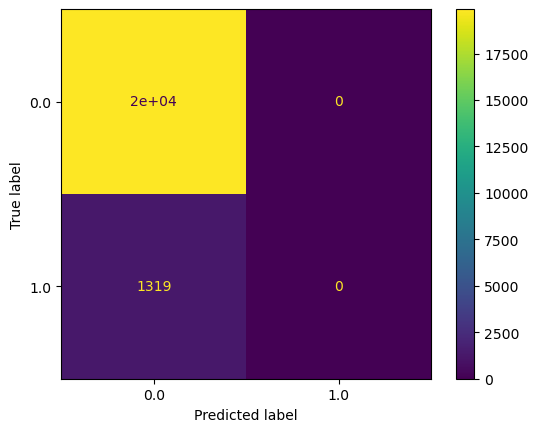

In [92]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv)

### GAUSSIAN NAIVE BAYES

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19889
         1.0       0.20      0.49      0.28      1319

    accuracy                           0.84     21208
   macro avg       0.58      0.68      0.60     21208
weighted avg       0.91      0.84      0.87     21208



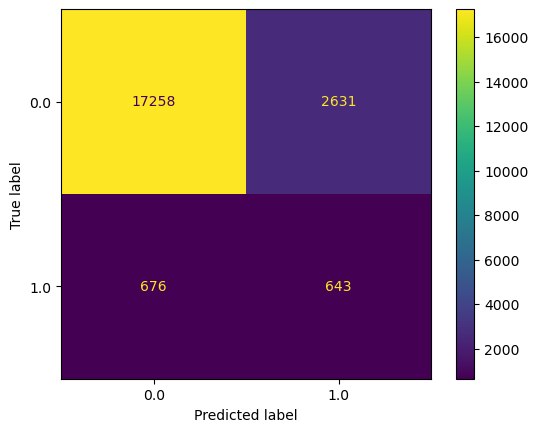

In [93]:
gnb=GaussianNB()
model_train_test(gnb)

### BERNOULLI NAIVE BAYES

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     19889
         1.0       0.22      0.34      0.27      1319

    accuracy                           0.88     21208
   macro avg       0.59      0.63      0.60     21208
weighted avg       0.91      0.88      0.90     21208



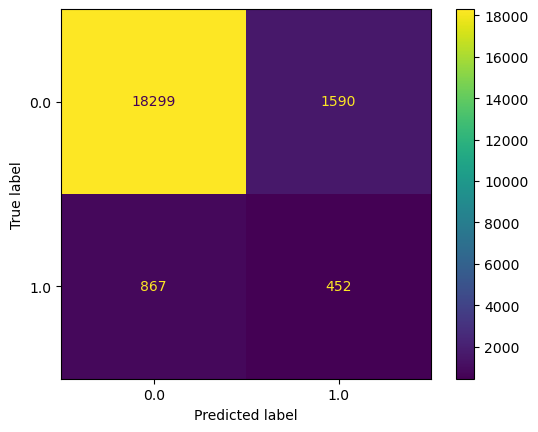

In [94]:
bnb=BernoulliNB()
model_train_test(bnb)

### K-NEAREST NEIGHBOURS

In [95]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [96]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 16}
Accuracy for our training dataset with tuning is : 93.76%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.31      0.01      0.01      1319

    accuracy                           0.94     21208
   macro avg       0.62      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



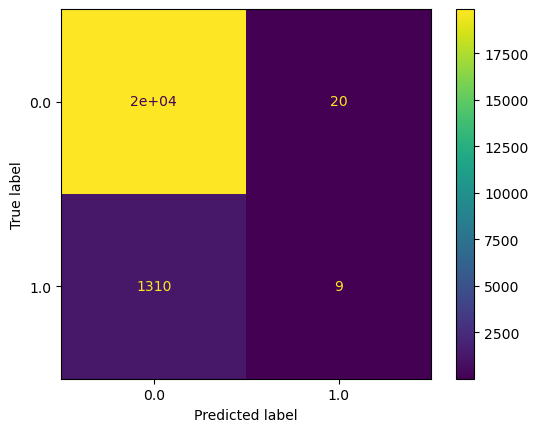

In [97]:
model_train_test(KNeighborsClassifier(n_neighbors=18))

### DECISION TREE

In [98]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, error_score='raise', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [99]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 93.78%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.00      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208



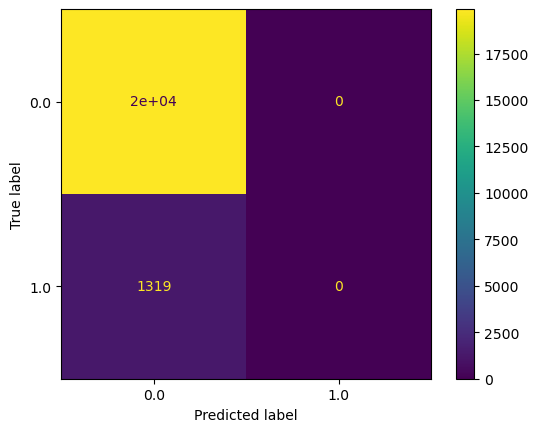

In [100]:
model_train_test(DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=5, max_features='sqrt'))